<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [5]:
# A:

In [7]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
test=df[['Pu239','Pu240']]

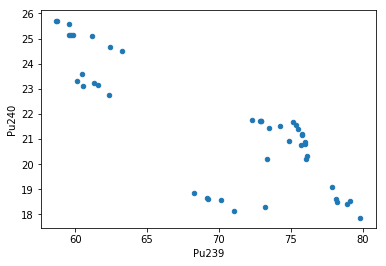

In [61]:
df.plot(kind = 'scatter', x='Pu239',y='Pu240')

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [6]:
# A:

In [16]:
from sklearn.cluster import KMeans

In [25]:
k = KMeans(n_clusters=3)
k.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [29]:
# A: 

df['Assignments']=k.predict(test)

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [78]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
centers = np.array(k.cluster_centers_)

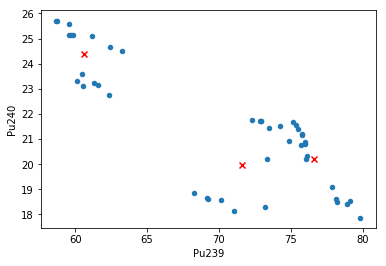

In [83]:
df.plot(kind = 'scatter', x='Pu239',y='Pu240')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [88]:
from sklearn.preprocessing import scale

In [101]:
scaled = scale(df[['Pu239','Pu240']])

scaled_df=pd.DataFrame(scaled)

In [99]:
k = KMeans(n_clusters=3)
k.fit(scaled)
scaled_centers = k.cluster_centers_

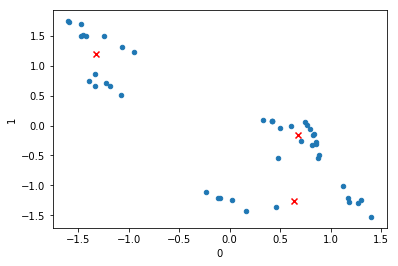

In [106]:
scaled_df.plot(kind = 'scatter', x=0,y=1)
plt.scatter(scaled_centers[:,0], scaled_centers[:,1], marker="x", color='r')

In [109]:
scaled_df['Predictions']=k.predict(scaled)

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
silhouette_score(test,df['Assignments'])

0.5950619279181214

In [111]:
silhouette_score(scaled,scaled_df['Predictions'])

0.6332174776862322